In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("..\\..\\isttc\\scripts"))
from cfg_global import isttc_results_folder_path

### Load data

In [6]:
results_folder = isttc_results_folder_path + 'synthetic_data\\tau200ms_rec5000ms\\'
dataset_folder = isttc_results_folder_path + 'synthetic_data\\dataset\\'

In [8]:
raw_data = np.load(dataset_folder + 'spike_train_tau200ms_500trials_5000ms.npy')

tau_pears_df = pd.read_pickle(results_folder + 'tau_pears_df.pkl')
tau_isttc_df = pd.read_pickle(results_folder + 'tau_isttc_df.pkl')

In [9]:
tau_pears_df_non_neg_1000 = tau_pears_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()
tau_isttc_df_non_neg_1000 = tau_isttc_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()

In [10]:
tau_pears_df_non_neg_1000

,tau,tau_ms,r_squared
0,2.254838,112.741912,0.865157
1,1.681367,84.068330,0.790023
2,2.790722,139.536112,0.944894
3,3.212106,160.605307,0.949535
4,7.197997,359.899863,0.979120
...,...,...,...
495,1.718608,85.930402,0.899309
496,1.702549,85.127456,0.880263
497,3.454555,172.727756,0.986366
498,12.931915,646.595733,0.979508


### Plots

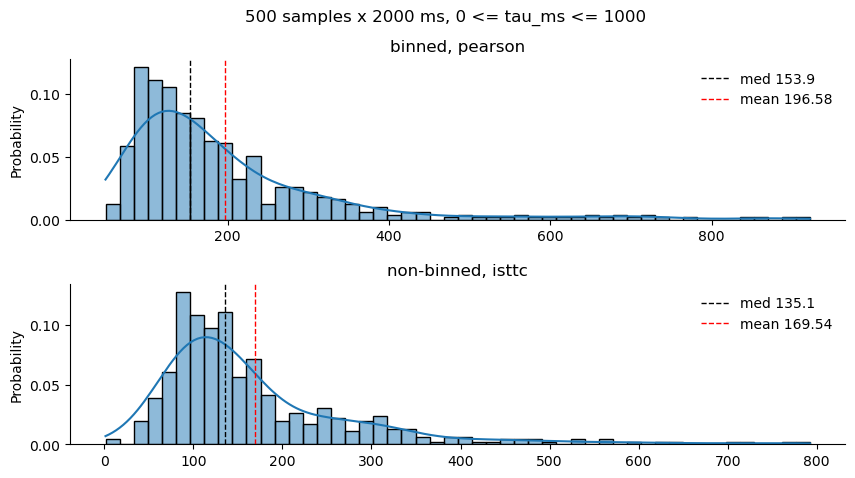

In [11]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df_non_neg_1000['tau_ms'].values)
tau_med = np.median(tau_pears_df_non_neg_1000['tau_ms'].values)
sns.histplot(ax=axes[0], x=tau_pears_df_non_neg_1000['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df_non_neg_1000['tau_ms'].values)
tau_med = np.median(tau_isttc_df_non_neg_1000['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df_non_neg_1000['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('500 samples x 2000 ms, 0 <= tau_ms <= 1000')

for ax in axes.flat:
    ax.legend(frameon=False)
sns.despine()

In [ ]:
tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=50)
tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=50)

fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[0], x=tau_pears_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('50 random samples x 5000 ms, 0 <= tau_ms <= 1000')

for ax in axes.flat:
    ax.legend(frameon=False)
sns.despine()

In [ ]:
n_samples = 50
pears_50_mean_l = []
isttc_50_mean_l = []
pears_50_med_l = []
isttc_50_med_l = []
for i in range(n_samples):
    tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=50)
    tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=50)
    pears_50_mean_l.append(np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    pears_50_med_l.append(np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_mean_l.append(np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_med_l.append(np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))

In [ ]:
print(pears_50_mean_l)
print(isttc_50_mean_l)

In [ ]:
pear_df = pd.DataFrame(np.vstack((pears_50_mean_l, pears_50_med_l)).T, columns=('mean', 'median'))
isttc_df = pd.DataFrame(np.vstack((isttc_50_mean_l, isttc_50_med_l)).T, columns=('mean', 'median'))
pear_df['metric'] = 'pearson'
isttc_df['metric'] = 'isttc'
combined_df = pd.concat([pear_df, isttc_df])
combined_df

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(6,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='metric', y='mean', data=combined_df, cut=0,  density_norm='width') 
sns.violinplot(ax=axes[1], x='metric', y='median', data=combined_df, cut=0,  density_norm='width') 

sns.despine()